<a href="https://colab.research.google.com/github/kasettakorn/covid19-radiography/blob/main/COVID19_radiograpgy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/kasettakorn/covid19-radiography.git

Cloning into 'covid19-radiography'...
remote: Enumerating objects: 13766, done.
remote: Total 13766 (delta 0), reused 0 (delta 0), pack-reused 13766
Receiving objects: 100% (13766/13766), 484.81 MiB | 36.17 MiB/s, done.
Checking out files: 100% (13809/13809), done.


In [10]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense, ReLU, Dropout, LeakyReLU
from keras.optimizers import Adam
from keras_preprocessing import image
from keras.applications.vgg16 import VGG16
import cv2
import os
import pandas as pd
from sklearn.model_selection import train_test_split

In [5]:
images, labels = [], []
label_main = []
def load_CTScan_images(folder):
    i = 0
    label_main.append(folder.split(os.path.sep)[-1])
    for filename in os.listdir(folder):
        try:
            img = cv2.imread(os.path.join(folder, filename))
            img = cv2.resize(img, (224, 224))
            img = image.img_to_array(img)
            images.append(img)
            labels.append(folder.split(os.path.sep)[-1])
            i = i+1
            if i > 600:
                break
        except:
            continue


load_CTScan_images('/content/covid19-radiography/COVID')
load_CTScan_images('/content/covid19-radiography/Normal')

In [16]:
x = np.array(images)/255
y = np.array(labels)
print(x.shape)
print(y.shape)

(1202, 224, 224, 3)
(1202,)


In [17]:
y = np.tile(np.array([0,0]), (x.shape[0], 1))
y[:601,0] = 1
y[601:,1] = 1
print(y.shape)

(1202, 2)


In [18]:
np.random.seed(1)
p = np.random.permutation(y.shape[0])
x, y = x[p], y[p]

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=1)

In [9]:
vgg16 = VGG16()

553476096/553467096 [==============================] - 4s 0us/step


In [20]:
model = Sequential()
for layer in vgg16.layers[:-1]:
    layer.trainable = False
    model.add(layer)
model.add(Dense(256))
model.add(LeakyReLU())
model.add(Dense(128))
model.add(ReLU())
model.add(Dense(64))
model.add(ReLU())
model.add(Dense(2, activation='softmax'))
adam = Adam(learning_rate=0.0001)

model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

In [22]:
model.fit(x_train, y_train, epochs=20, use_multiprocessing=True)

Epoch 1/20
31/31 [==============================] - 4s 121ms/step - loss: 0.4675 - accuracy: 0.7815
Epoch 2/20
31/31 [==============================] - 4s 122ms/step - loss: 0.4687 - accuracy: 0.7846
Epoch 3/20
31/31 [==============================] - 4s 122ms/step - loss: 0.4416 - accuracy: 0.8106
Epoch 4/20
31/31 [==============================] - 4s 123ms/step - loss: 0.4310 - accuracy: 0.8189
Epoch 5/20
31/31 [==============================] - 4s 123ms/step - loss: 0.4774 - accuracy: 0.7648
Epoch 6/20
31/31 [==============================] - 4s 125ms/step - loss: 0.5284 - accuracy: 0.7399
Epoch 7/20
31/31 [==============================] - 4s 125ms/step - loss: 0.4448 - accuracy: 0.8127
Epoch 8/20
31/31 [==============================] - 4s 126ms/step - loss: 0.4952 - accuracy: 0.7877
Epoch 9/20
31/31 [==============================] - 4s 125ms/step - loss: 0.4198 - accuracy: 0.8085
Epoch 10/20
31/31 [==============================] - 4s 126ms/step - loss: 0.4077 - accuracy: 0.8179

In [ ]:
print(y[0])

[0 1]


In [ ]:
import tensorflow as tf

# Convert the model.
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the model.
with open('model.tflite', 'wb') as f:
  f.write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmpm2h5tv32/assets


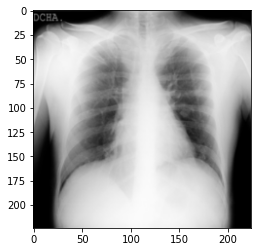

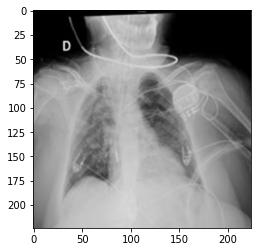

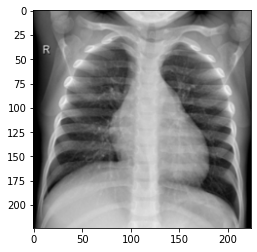

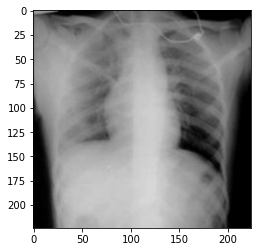

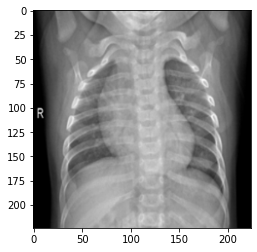

[[[[139 139 139]
   [139 139 139]
   [139 139 139]
   ...
   [  4   4   4]
   [  4   4   4]
   [  5   5   5]]

  [[ 13  13  13]
   [ 13  13  13]
   [ 13  13  13]
   ...
   [  2   2   2]
   [  2   2   2]
   [  2   2   2]]

  [[  0   0   0]
   [  0   0   0]
   [  0   0   0]
   ...
   [  1   1   1]
   [  2   2   2]
   [  2   2   2]]

  ...

  [[  0   0   0]
   [  0   0   0]
   [  0   0   0]
   ...
   [  0   0   0]
   [  0   0   0]
   [  0   0   0]]

  [[  0   0   0]
   [  0   0   0]
   [  0   0   0]
   ...
   [  0   0   0]
   [  0   0   0]
   [  0   0   0]]

  [[  0   0   0]
   [  0   0   0]
   [  0   0   0]
   ...
   [  0   0   0]
   [  0   0   0]
   [  0   0   0]]]


 [[[  0   0   0]
   [  0   0   0]
   [  0   0   0]
   ...
   [  0   0   0]
   [  0   0   0]
   [  0   0   0]]

  [[  0   0   0]
   [  0   0   0]
   [  0   0   0]
   ...
   [  0   0   0]
   [  0   0   0]
   [  0   0   0]]

  [[  0   0   0]
   [  0   0   0]
   [  0   0   0]
   ...
   [  0   0   0]
   [  0   0   0]
   [  0   0

In [6]:
from keras.models import load_model

predict_model = load_model('/content/covid.h5')


# A few random samples
use_samples = ['COVID/COVID-1000', 'COVID/COVID-1001', 'Normal/Normal-1002', 'COVID/COVID-1013', 'Normal/Normal-1004']
samples_to_predict = []

# Generate plots for samples
for sample in use_samples:
    
  # Generate a plot
    
    img = cv2.imread("/content/covid19-radiography/"+sample+".png")
    img = cv2.resize(img, (224, 224))
  
    plt.imshow(img)
    plt.show()
    # Add sample to array for prediction
    samples_to_predict.append(img)

# Convert into Numpy array
samples_to_predict = np.array(samples_to_predict)
print(samples_to_predict)

# # Generate predictions for samples
predictions = predict_model.predict(samples_to_predict)
print(predictions)

# # Generate arg maxes for predictions
classes = np.argmax(predictions, axis = 1)
print(classes)